パーセプトロンの数式

$$ 
y =  
\begin{cases}
  0 & (b + w_1 x_1 + w_2 x_2 \le 0)\\
  1 & (b + w_1 x_1 + w_2 x_2 > 0)
\end{cases}
\tag{3.1}
$$

よりシンプルに場合分けに$$h(x)$$ (活性化関数: activation function)導入

$$ 
y = h(b + w_1 x_1 + w_2 x_2) 
\tag{3.2}
$$

$$
h(x) =  
\begin{cases}
  0 & (x \le 0)\\
  1 & (x > 0)
\end{cases}
\tag{3.3}
$$

(3.2)を丁寧に書くと

$$
a = b + w_1 x_1 + w_2 x_2\tag{3.4}
$$


$$
y = h(a)\tag{3.5}
$$


パーセプトロンは活性化関数にステップ関数を利用している。

## 3.2 活性化関数

### 3.2.1 シグモイド関数

$$
h(x) = \frac{1} {1 + exp(-x)}\tag{3.6}
$$

ステップ関数の実装

In [1]:
import numpy as np
def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [2]:
step_function(np.array([-1]))

array([0])

### 3.2.3

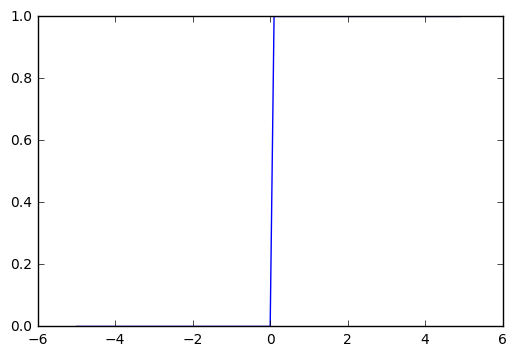

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.show()

### 3.2.4

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


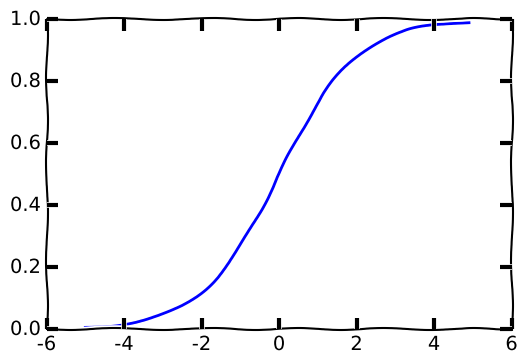

In [3]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.arange(-5,5,0.1)
y = sigmoid(x)

plt.xkcd()
plt.plot(x,y)
plt.show()

numpyがブロードキャストしてスカラ値との演算を簡単にしてくれる

In [5]:
a = np.array([1,2,3])
print(a/2)
print(a+1)

[ 0.5  1.   1.5]
[2 3 4]


パーセプトロンではステップ関数→流れる値が0か1に限定
ニューラルネットではシグモイド関数→流れる値が連続値

### 3.2.6

重要なのは**非線形性**
ステップ関数やシグモイド関数のように非線形な活性化関数を利用することで層を深くすることに意味が出てくる
例えばh(x)=ax とすると3層重ねてもh(x)=a^3xとなり、本質的に何も変わらない

### 3.2.7 ReLu関数

$$
h(x) = \begin{cases}
x & (x > 0)\\
0 & (x \le 0)
\end{cases}
$$

## 3.3 多次元配列の計算

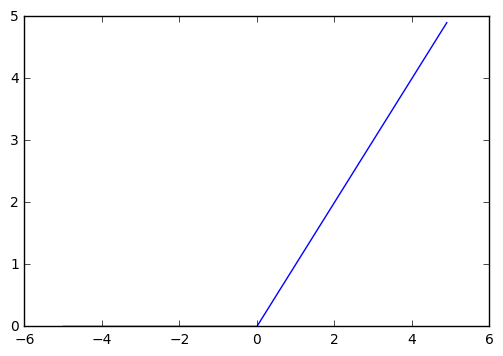

In [6]:
def relu(x):
    return np.maximum(x, 0)
x = np.arange(-5,5,0.1)
y = relu(x)

plt.plot(x,y)
plt.show()

### 3.3.1

In [7]:
import numpy as np
A = np.array(
    [1,2,3,4]
    )
B = np.array(
    [[ 1, 2, 3, 4],
     [ 5, 6, 7, 8],
     [ 9,10,11,12]]
    )
C = np.array(
    [[[ 1, 2, 3, 4],
      [ 5, 6, 7, 8],
      [ 9,10,11,12]],
     [[13,14,15,16],
      [17,18,19,20],
      [21,22,23,24]]]
    )

In [8]:
print(np.ndim(A))
print(np.ndim(B))
print(np.ndim(C))

1
2
3


In [9]:
print(A.shape)
print(A.shape[0])
print(B.shape)
print(B.shape[0])
print(C.shape)
print(C.shape[0])

(4,)
4
(3, 4)
3
(2, 3, 4)
2


np.ndimはタプルで返されることに注意

### 3.3.2 内積

In [10]:
A = np.array([[1,2],[3,4]])
B = np.array([[5,6],[7,8]])
np.dot(A,B)

array([[19, 22],
       [43, 50]])

### 3.3.3. NNの内積

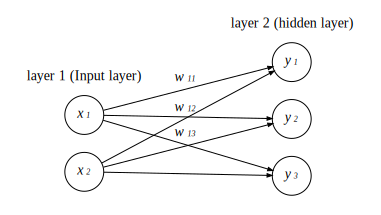

In [11]:
from graphviz import Source
net = Source(
'''digraph "G" {
    rankdir=LR
    splines=line
    
    node [fontname="Times-Italic"];
    edge [fontname="Times-Italic",arrowsize=0.5];

    subgraph cluster_0 {
        color=white;
        node [style=solid, shape=circle];
        x1 x2 ;
        label = "layer 1 (Input layer)";
    }
    
    subgraph cluster_1 {
        color=white;
        node [style=solid, shape=circle];
        y1 y2 y3;
        label = "layer 2 (hidden layer)";
    }
    
    x1 -> y1 [label=<w<sub><font point-size="8">11</font></sub>>];
    x1 -> y2 [label=<w<sub><font point-size="8">12</font></sub>>];
    x1 -> y3 [label=<w<sub><font point-size="8">13</font></sub>>];
    x2 -> y1 ;
    x2 -> y2 ;
    x2 -> y3 ;
    
    x1 [label=<x<sub><font point-size="8">1</font></sub>>];
    x2 [label=<x<sub><font point-size="8">2</font></sub>>];
    y1 [label=<y<sub><font point-size="8">1</font></sub>>];
    y2 [label=<y<sub><font point-size="8">2</font></sub>>];
    y3 [label=<y<sub><font point-size="8">3</font></sub>>];
}'''
)
net

上記のようなNNだと、y_1は
$$
\begin{cases}
y_1 = w_{11} x_1 + w_{21} x_2 \\
y_2 = w_{12} x_1 + w_{22} x_2 \\
y_3 = w_{13} x_1 + w_{23} x_2
\end{cases}
$$

行列で表すと
$$
\bf{Y} = \bf{WX}
$$

$$
{\bf{Y}} = \left(
    \begin{array}{ccc}
      y_1 \\
      y_2 \\
      y_3 
    \end{array}
   \right),
{\bf{W}} = \left(
    \begin{array}{ccc}
      w_{11} & w_{21} \\
      w_{21} & w_{22} \\
      w_{31} & w_{32} 
    \end{array}
  \right),
  {\bf{Y}} = \left(
    \begin{array}{ccc}
      x_1 \\
      x_2 \\
    \end{array}
   \right),
$$

一度でNNを計算できる。

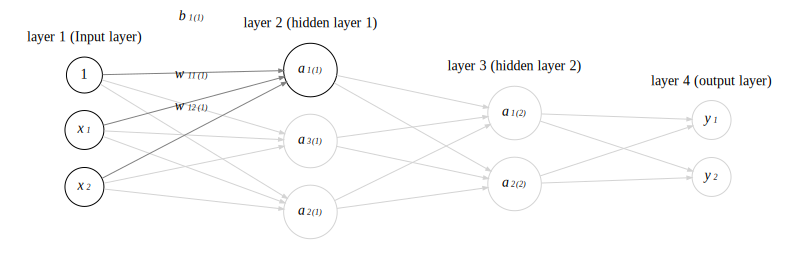

In [12]:
from graphviz import Source
net = Source(
'''digraph "G" {
    rankdir=LR
    splines=line
    
    node [fontname="Times-Italic"];
    edge [fontname="Times-Italic",arrowsize=0.5,color="#D3D3D3"];

    subgraph cluster_0 {
        color=none;
        node [style=solid, shape=circle];
        1 x1 x2;
        label = "layer 1 (Input layer)";
    }
    
    subgraph cluster_1 {
        color=none;
        node [style=solid, shape=circle];
        a11 a21 a31;
        label = "layer 2 (hidden layer 1)";
    }
    subgraph cluster_2 {
        color=none;
        node [style=solid, shape=circle];
        a12 a22;
        label = "layer 3 (hidden layer 2)";
    }
    subgraph cluster_3 {
        color=none;
        node [style=solid, shape=circle];
        y1 y2;
        label = "layer 4 (output layer)";
    }
    1  -> a11 [color="#808080",label=<b<sub><font point-size="8">1</font></sub><sup><font point-size="8">(1)</font></sup>>];
    1  -> a21
    1  -> a31
    x1 -> a11 [color="#808080",label=<w<sub><font point-size="8">11</font></sub><sup><font point-size="8">(1)</font></sup>>];
    x1 -> a21 
    x1 -> a31 
    x2 -> a11 [color="#808080",label=<w<sub><font point-size="8">12</font></sub><sup><font point-size="8">(1)</font></sup>>];
    x2 -> a21 
    x2 -> a31 
    a11 -> a12
    a11 -> a22
    a21 -> a12
    a21 -> a22
    a31 -> a12
    a31 -> a22
    a12 -> y1
    a12 -> y2
    a22 -> y1
    a22 -> y2
    
    1 [fontname="Times", fillcolor="#D3D3D"];
    x1 [label=<x<sub><font point-size="8">1</font></sub>>];
    x2 [label=<x<sub><font point-size="8">2</font></sub>>];
    a11 [label=<a<sub><font point-size="8">1</font></sub><sup><font point-size="8">(1)</font></sup>>];
    a21 [color="#D3D3D3",label=<a<sub><font point-size="8">2</font></sub><sup><font point-size="8">(1)</font></sup>>];
    a31 [color="#D3D3D3",label=<a<sub><font point-size="8">3</font></sub><sup><font point-size="8">(1)</font></sup>>];
    a12 [color="#D3D3D3",label=<a<sub><font point-size="8">1</font></sub><sup><font point-size="8">(2)</font></sup>>];
    a22 [color="#D3D3D3",label=<a<sub><font point-size="8">2</font></sub><sup><font point-size="8">(2)</font></sup>>];
    y1 [color="#D3D3D3",label=<y<sub><font point-size="8">1</font></sub>>];
    y2 [color="#D3D3D3",label=<y<sub><font point-size="8">2</font></sub>>];

}'''
)
net

$$
a_1^{(1)}=w_{11}^{(1)}x_1+w_{12}^{(1)}x_2+b_1^{(1)}
\tag{3.8}
$$

$$
{\bf{A}} ^{(1)} ={\bf{X}}{\bf{W}}^{(1)}+{\bf{B}}^{(1)}
\tag{3.9}
$$

$$
{\bf{A}}^{(1)} =(a_1^{(1)},a_2^{(1)},a_3^{(1)}),  
{\bf{X}} =(x_1, x_2), 
{\bf{W}}^{(1)} = \left(
    \begin{array}{ccc}
      w_{11}^{(1)} & w_{21}^{(1)} & w_{31}^{(1)} \\
      w_{12}^{(1)} & w_{22}^{(1)} & w_{32}^{(1)} 
    \end{array}
  \right), 
{\bf{B}}^{(1)} = (b_1^{(1)},b_2^{(1)},b_3^{(1)})
$$

In [13]:
import numpy as np

X = np.array([1.0, 0.5])
W1 = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
B1 = np.array([0.1,0.2,0.3])

print(X.shape)
print(W1.shape)
print(B1.shape)

A1 = np.dot(X, W1)+B1
print(A1)

(2,)
(2, 3)
(3,)
[ 0.3  0.7  1.1]


In [14]:
Z1 = sigmoid(A1)
print(Z1)

[ 0.57444252  0.66818777  0.75026011]


In [15]:
W2 = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
B2 = np.array([0.1,0.2])

A2 = np.dot(Z1, W2)+B2
Z2 = sigmoid(A2)

print(A2)
print(Z2)

[ 0.51615984  1.21402696]
[ 0.62624937  0.7710107 ]


In [16]:
def identity_function(x):
    return x

W3 = np.array([[0.1,0.3],[0.2,0.4]])
B3 = np.array([0.1,0.2])

A3 = np.dot(Z2, W3)+B3
Z3 = identity_function(A3)

print(A3)
print(Z3)

[ 0.31682708  0.69627909]
[ 0.31682708  0.69627909]


### 3.4.3 実装まとめ

In [17]:
def init_network():
    network = {}
    network['W1'] = np.linspace(0.1,0.6,6).reshape(3,2).T
    network['b1'] = np.linspace(0.1,0.3,3)
    network['W2'] = np.linspace(0.1,0.6,6).reshape(2,3).T
    network['b2'] = np.linspace(0.1,0.2,2)
    network['W3'] = np.linspace(0.1,0.4,4).reshape(2,2).T
    network['b3'] = np.linspace(0.1,0.2,2)

    return(network)
    
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()
x = np.array([0.1, 0.5])
y = forward(network, x)
print(y)
print(network)

[ 0.31234736  0.6863161 ]
{'W1': array([[ 0.1,  0.3,  0.5],
       [ 0.2,  0.4,  0.6]]), 'b3': array([ 0.1,  0.2]), 'b2': array([ 0.1,  0.2]), 'W2': array([[ 0.1,  0.4],
       [ 0.2,  0.5],
       [ 0.3,  0.6]]), 'b1': array([ 0.1,  0.2,  0.3]), 'W3': array([[ 0.1,  0.3],
       [ 0.2,  0.4]])}


### 3.5.1 ソフトマックス

$$
y_k = \frac{\exp(a_k)}{\sum_{i=1}^{n} \exp(a_i)}
$$

これだと桁あふれする場合があるから実装上は改良の必要

$$
y_k = \frac{\exp(a_k)}{\sum_{i=1}^{n} \exp(a_i)}
= \frac{C\exp(a_k)}{C\sum_{i=1}^{n} \exp(a_i)}
= \frac{\exp(a_k +\log C)}{\sum_{i=1}^{n} \exp(a_i + \log C)}
= \frac{\exp(a_k + C')}{\sum_{i=1}^{n} \exp(a_i + C')}
$$

何かを足しても引いてもソフトマックスの計算結果は変化しない

In [18]:
a = np.arange(1010, 989, -10)
np.exp(a) / np.sum(np.exp(a))

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


array([ nan,  nan,  nan])

In [19]:
c = np.max(a)
np.exp(a-c) / np.sum(np.exp(a-c))

array([  9.99954600e-01,   4.53978686e-05,   2.06106005e-09])

In [20]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

a = np.array([0.3,2.9,4.0])
y = softmax(a)
print(y)
np.sum(y)

[ 0.01821127  0.24519181  0.73659691]


1.0

確率として示すことができる。
ソフトマックス関数を通しても大小関係は変わらない
計算コストがかかるため出力層のソフトマックスは省略するのが一般的

In [27]:
import importlib
mnist = importlib.import_module('deep-learning-from-scratch.dataset.mnist') # ハイフン付きのモジュール無理やり読み込む用

In [28]:
load_mnist = mnist.load_mnist

In [30]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True,normalize=False)
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


5
(784,)
(28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 

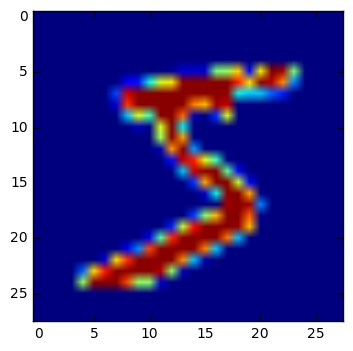

In [32]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from PIL import Image

import importlib
load_mnist = importlib.import_module('deep-learning-from-scratch.dataset.mnist').load_mnist # ハイフン付きのモジュール無理やり読み込む用

import matplotlib.pyplot as plt

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    plt.imshow(pil_img) # Jupyterのため改定
    plt.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)  # 5

print(img.shape)  # (784,)
img = img.reshape(28, 28)  # 形状を元の画像サイズに変形
print(img.shape)  # (28, 28)
print(img)
img_show(img)

### 3.6.2 学習済みのパラメータによる推論

In [34]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import pickle
# from dataset.mnist import load_mnist
# from common.functions import sigmoid, softmax # 上で定義済みのもので代替

load_mnist = importlib.import_module('deep-learning-from-scratch.dataset.mnist').load_mnist # ハイフン付きのモジュール無理やり読み込む用

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("deep-learning-from-scratch/ch03/sample_weight.pkl", 'rb') as f: # 書き換え
        network = pickle.load(f)
    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y


x, t = get_data()
network = init_network()
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p= np.argmax(y) # 最も確率の高い要素のインデックスを取得
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))
print(network['W1'].shape)
print(network['W2'].shape)
print(network['W3'].shape)

Accuracy:0.9352
(784, 50)
(50, 100)
(100, 10)


### バッチ処理

In [36]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import pickle
# from dataset.mnist import load_mnist
# from common.functions import sigmoid, softmax

load_mnist = importlib.import_module('deep-learning-from-scratch.dataset.mnist').load_mnist # ハイフン付きのモジュール無理やり読み込む用


def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("deep-learning-from-scratch/ch03/sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    w1, w2, w3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, w1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, w2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, w3) + b3
    y = softmax(a3)

    return y


x, t = get_data()
network = init_network()

batch_size = 100 # バッチの数
accuracy_cnt = 0
"""
for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))
"""
print(x[0:0+batch_size].shape)
y = predict(network,x[0:0+batch_size])
print(y.shape)
p = np.argmax(y, axis=1)
print(p)

(100, 784)
(100, 10)
[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 6 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 2 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 4 3 1 4 1 7 6 9]


一気に配列で処理するイメージかな